<a href="https://colab.research.google.com/github/soccersuki/PRML/blob/master/Linear_basis_function_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overall
I implemented and applied Linear basis function model, using Boston house-prices dataset which is given by scikit-learn. I used Polynomial(1st~4th-order), Gaussian, Sigmoid basis function for the model.<br>
In this code, the target variable is median value of owner-occupied homes in \$1000's which is written MEDV, and the explanatory variable is lower status of the population which is written LSTAT.
So, the code below predicts MEDV from RM.
First, I explain linear basis function model, and then I report Evaluation of the model which I implemented including quantitative analysis and adequate plots.

# Linear basis function model
Linear basis function model is written
$$
y({\bf x,w}) = w_0 + \sum_{j=1}^{M-1}w_j\phi_j({\bf x})
$$
where $\phi_j({\bf x})$ are known as basis functions.
We rewrite this as
$$
y({\bf x,w}) = \sum_{j=0}^{M-1}w_j\phi_j({\bf x}) = {\bf w}^T{\bf \phi(x)}
$$
where ${\bf w} = (w_0,...,w_{M-1})^T$ and $ {\bf \phi} = (\phi_0,...,\phi_{M-1})$.
There are many possible choices for the basis functions, for example
* Polynomial basis function
$$
\phi_j({\bf x})=x^j
$$
* Gaussian basis function
$$
\phi_j({\bf x})=\exp\left\{-\frac{(x-\mu_j)^2}{2s^2}\right\}
$$
* sigmoidal basis function
$$
\phi_j({\bf x})=\sigma\left(\frac{x-\mu_j}{s}\right)
$$

Our goal is to get optimal parameter $\bf w$.

# Maximum likelihood
We assume that target variable t is given by a deterministic function $y({\bf x},{\bf w})$ with additive Gaussian noise so that
$$
t = y({\bf x,w}) + \epsilon
$$
where $\epsilon$ is a zero mean Gaussian random variable with precision $\beta$. Thus we can write
$$
p(t|{\bf x,w},\beta) = \mathcal{N}(t|y({\bf x,w}),\beta^{-1})
$$
Given a data set of inputs ${\bf X} = \{x_1,...,x_N\}$ with corresponding values ${\bf t} = \{t_1,...t_N\}$, likelihood function is written
$$
p({\bf t|X,w},\beta)=\prod_{n=1}^N\mathcal{N}(t_n|{\bf w}^T{\bf \phi}({\bf x}_n),\beta^{-1}).
$$
Taking the logarithm of the likelihood function, we have
$$
\begin{align}
\ln p({\bf t}|{\bf w}, \beta) &= \sum_{n=1}^N\ln \mathcal{N}(t_n|{\bf w}^T{\bf \phi}({\bf x}_n),\beta^{-1}) \\
&= \frac{N}{2}\ln \beta - \frac{N}{2}\ln (2 \pi) - \beta E_D({\bf w})
\end{align}
$$
where the sum-of-squares error function is defined by
$$
E_D({\bf w})=\frac{1}{2}\sum_{n=1}^N\{t_n-{\bf w}^T{\bf \phi}({\bf x}_n)\}^2.
$$
Maximization of the likelihood function under a conditional Gaussian noise distribution for a linear model is equivalent to minimizing a sum-of-squares error function given by $E_D({\bf w})$.
The gradient of the log likelihood function takes the form
$$
\nabla \ln p({\bf t}|{\bf w}, \beta) = \sum_{n=1}^{N}\{ t_n - {\bf w}^T\phi({\bf w}_n)\} \phi({\bf x}_n)^T.
$$
Setting this gradient to zero gives
$$
0 = \sum_{n=1}^{N}t_n\phi({\bf x}_n)^T - {\bf w}^T(\sum_{n=1}^{N}\phi({\bf x}_n)\phi({\bf x}_n)^T.
$$
Solving for $\bf w$ we obtain
$$
{\bf w}_{ML} = ({\bf \Phi}^T{\bf \Phi})^{-1}{\bf \Phi}^T{\bf t}
$$
which are known as the normal equations for the least squares problem. Here $\bf \Phi$ is an $N\times M$ matrix, called the design matrix, whose elements are given by ${\bf \Phi}_{nj} = \phi_j({\bf x}_n)$, so that
$$
\begin{eqnarray}  {\bf \Phi} = \left(  \begin{array}{ccccc}  \phi_0(x_1) & \cdots & \phi_m(x_1) & \cdots & \phi_{M-1}(x_1)\\  \vdots & \ddots & & & \vdots \\  \phi_0(x_n) & \cdots & \phi_m(x_n) & \cdots & \phi_{M-1}(x_n) \\  \vdots & & & \ddots & \vdots \\  \phi_0(x_N) & \cdots & \phi_m(x_N) & \cdots & \phi_{M-1}(x_N)  \end{array}  \right)  \end{eqnarray}.
$$

# Evaluation including quantitative analysis and adequate plots
For quantitative analysis, I used mean squared error(MSE), and coefficient of determination(R2).

|Basis function|MSE|R2|
|---|---|---|
|First-order polynomial|44.3103301732132|0.024736823754550|
|Second-order polynomial|36.6113438901919|0.207272163389304|
|Third-order polynomial|34.5682133513197|0.283765433825935|
|Forth-order polynomial|32.3061360615684|0.317126470024792|
|Gaussian|81.8702142022880|-5548.61637382321|
|Sigmoid|42.6315884024816|0.105666993636297|

From the above table, in the case of using forth-order polynomial basis function, MSE and R2 are the best score. On the other hand, in the case of using Gaussian or Sigmoid basis function, MSE and R2 are not good. That is because there is only one basis function. In the case of using Gaussian or Sigmoid basis function, as the number of basis function increases, MSE and R2 should also increase.

# References
* Christopher M. Bishop, Pattern Recognition And Machine Learning
* https://tips-memo.com/linear-regression


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import DataFrame
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
def Polynomial(x, M):
    phi_x = np.array([x**(j) for j in range(M+1)]).T
    return phi_x


In [ ]:
def Gaussian(X):
    D = X.shape[0]
    N = X.shape
    mu = np.array([[np.mean(X[j,:]) for j in range(D)]]).T
    s = np.array([[np.sqrt(np.var(X[j, :])) for j in range(D)]]).T
    phi_x = np.array(np.e**(-(X - mu)**2 / (2*s**2))).T
    return phi_x


In [ ]:
def Sigmoid(X):
    D = X.shape[0]
    N = X.shape
    mu = np.array([[np.mean(X[j,:]) for j in range(D)]]).T
    s = np.array([[np.sqrt(np.var(X[j, :])) for j in range(D)]]).T
    a = (X - mu) / s
    phi_x = 1/(1+np.e**(-a)).T
    return phi_x


In [ ]:
def DesignMatrix(phi_X):
    N = phi_X.shape[0]
    phi_ones = np.ones(N).T
    design_matrix = np.c_[phi_ones, phi_X]
    return design_matrix


In [ ]:
def OptimalWeight(design_matrix, t):
    optimal_weight = (np.linalg.inv(design_matrix.T @ design_matrix) @ (design_matrix.T)) @ t.T
    return optimal_weight


In [ ]:
def Model(weight, phi_x):
    y_out = weight.T @ phi_x
    return y_out


In [ ]:
def linear_basis_function_model(x_train, x_test, y_train, y_test, func, order = -1):
    fn = func.__name__
    print(fn + str(order) if fn == "Polynomial" else fn)
    
    x_train_poly = x_train.flatten()
    x_test_poly = x_test.flatten()

    if fn == "Polynomial":
        phi_X = func(x_train_poly, order)
        DM = phi_X
    else:
        phi_X = func(x_train)
        DM = DesignMatrix(phi_X)

    w_opt = OptimalWeight(DM, y_train)

    if fn == "Polynomial":
        phi_X_test = func(x_test_poly, order)
        DM_test = phi_X_test
    else:
        phi_X_test = func(x_test)
        DM_test = DesignMatrix(phi_X_test)


    N_test = DM_test.shape[0]
    y_pred = np.array([Model(w_opt, DM_test[n,:]) for n in range(N_test)])

    
    #Quantitative evaluation
    mse = mean_squared_error(y_pred, y_test)
    R2 = r2_score(y_pred, y_test)
    print('MSE = ', mse)
    print('R2 = ', R2)

    
    #Visual evaluation
    xlist = np.arange(np.min(x_train), np.max(x_train), 0.01)
    Xlist = np.array([xlist])

    if fn == "Polynomial":
        ylist = [Model(w_opt, func(x, order)) for x in xlist]
    else:
        DM_graph = DesignMatrix(func(Xlist))
        N_graph = DM_graph.shape[0]
        ylist = np.array([Model(w_opt, DM_graph[n,:]) for n in range(N_graph)])


    plt.xlabel('Explanatory variable')
    plt.ylabel('Target variable')
    plt.title(fn + str(order) if fn == "Polynomial" else fn)
    plt.plot(xlist, ylist)
    plt.plot(x_train.flatten(), y_train, "o")
    plt.show()


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

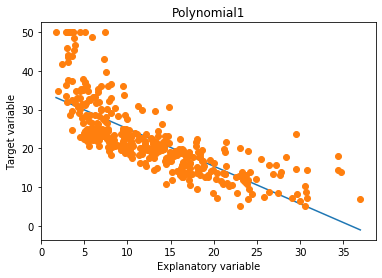

Polynomial2
MSE =  36.611343890191876
R2 =  0.20727216338930432


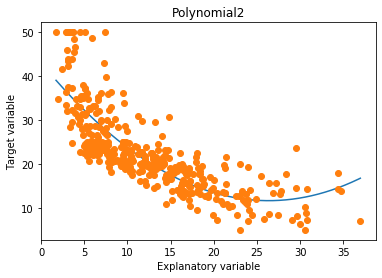

Polynomial3
MSE =  34.56821335131971
R2 =  0.28376543382593444


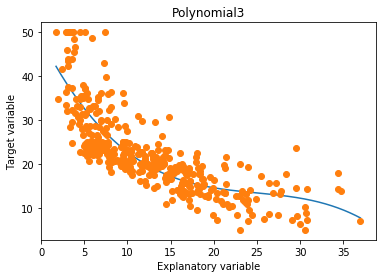

Gaussian
MSE =  81.87021420228804
R2 =  -5548.616373823206


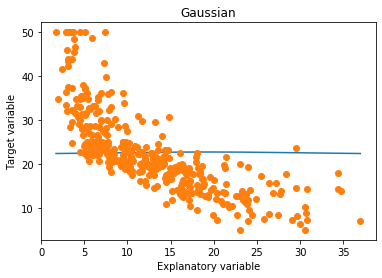

Sigmoid
MSE =  42.63158840248164
R2 =  0.1056669936362965


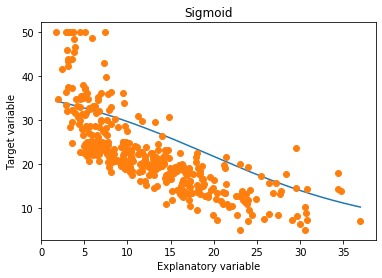

In [ ]:
#Make data frame
boston = datasets.load_boston()
print(boston.DESCR)
df = pd.DataFrame(boston.data, columns=boston.feature_names)

#Split the data. 75% of the data is training data, and remaining data is testing data.
x_train, x_test, y_train, y_test = train_test_split(boston.data[:, [12]], boston.target, random_state=0)
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

#Linear basis function models
for i in range(1, 4):
    linear_basis_function_model(x_train, x_test, y_train, y_test, Polynomial, i)

linear_basis_function_model(x_train, x_test, y_train, y_test, Gaussian)
linear_basis_function_model(x_train, x_test, y_train, y_test, Sigmoid)
